<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-09-12 05:28:03--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  59.8MB/s    in 2.5s    

2025-09-12 05:28:06 (59.8 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



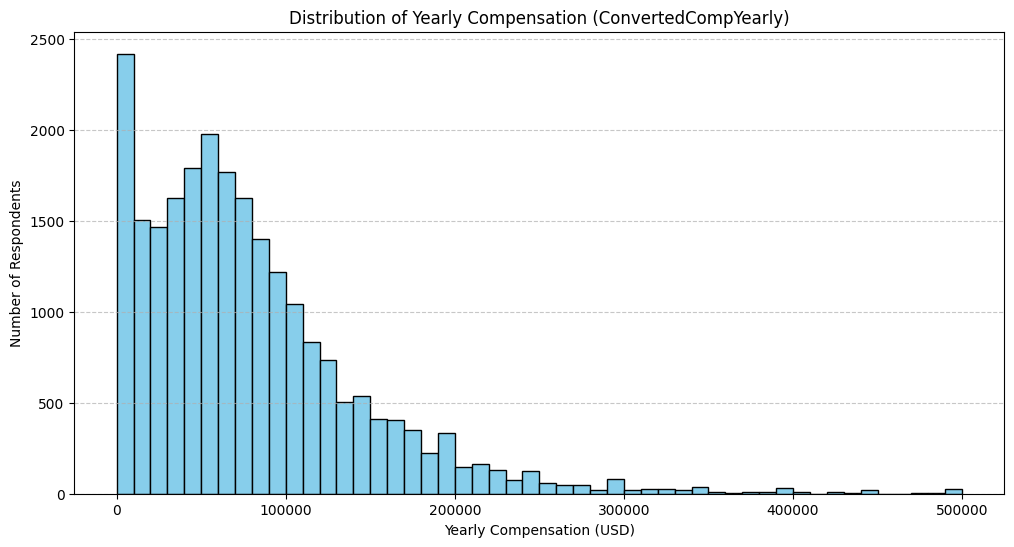

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Step 2: Query ConvertedCompYearly column
QUERY = """
SELECT ConvertedCompYearly
FROM main
WHERE ConvertedCompYearly IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Step 3: Close the database connection
conn.close()

# Step 4: Remove outliers (optional, adjust as needed)
df = df[df['ConvertedCompYearly'] <= 500000]  # Removing extremely high values

# Step 5: Plot histogram
plt.figure(figsize=(12,6))
plt.hist(df['ConvertedCompYearly'], bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Yearly Compensation (ConvertedCompYearly)")
plt.xlabel("Yearly Compensation (USD)")
plt.ylabel("Number of Respondents")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



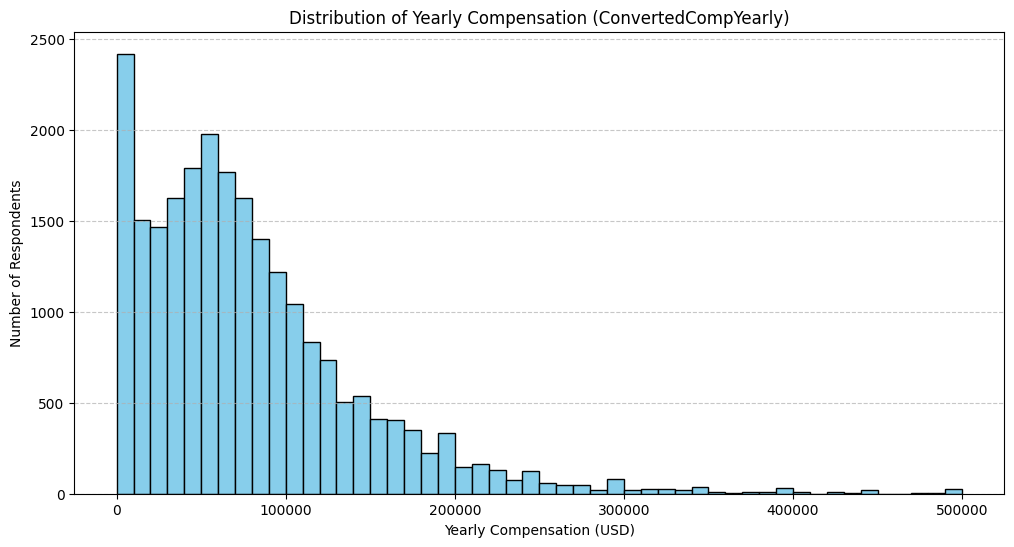

In [5]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Step 2: Query ConvertedCompYearly column
QUERY = """
SELECT ConvertedCompYearly
FROM main
WHERE ConvertedCompYearly IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Step 3: Close the database connection
conn.close()

# Step 4: Remove outliers (optional, adjust as needed)
df = df[df['ConvertedCompYearly'] <= 500000]  # Removing extremely high values

# Step 5: Plot histogram
plt.figure(figsize=(12,6))
plt.hist(df['ConvertedCompYearly'], bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Yearly Compensation (ConvertedCompYearly)")
plt.xlabel("Yearly Compensation (USD)")
plt.ylabel("Number of Respondents")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



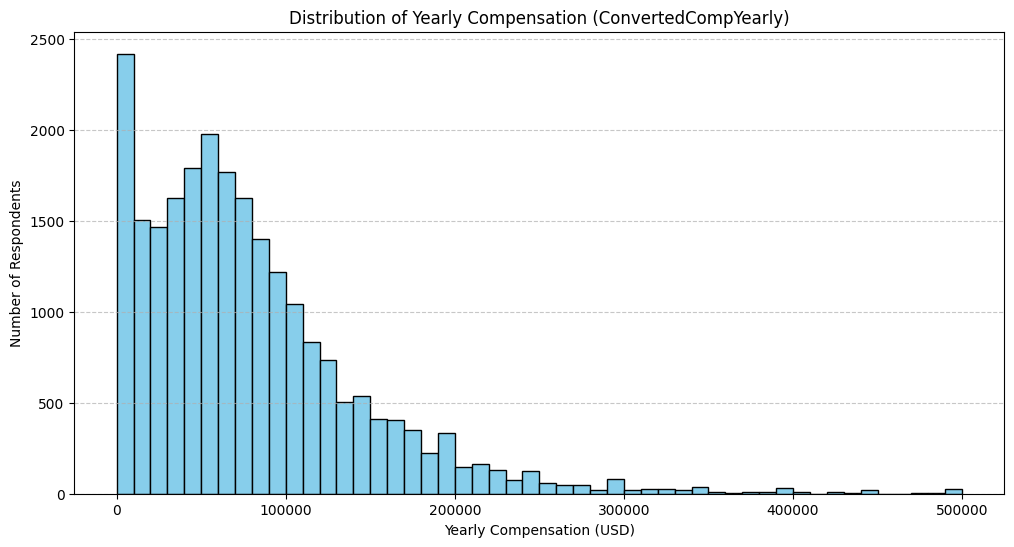

In [6]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Step 2: Query ConvertedCompYearly column
QUERY = """
SELECT ConvertedCompYearly
FROM main
WHERE ConvertedCompYearly IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Step 3: Close the database connection
conn.close()

# Step 4: Remove outliers (optional, adjust as needed)
df = df[df['ConvertedCompYearly'] <= 500000]  # Removing extremely high values

# Step 5: Plot histogram
plt.figure(figsize=(12,6))
plt.hist(df['ConvertedCompYearly'], bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Yearly Compensation (ConvertedCompYearly)")
plt.xlabel("Yearly Compensation (USD)")
plt.ylabel("Number of Respondents")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


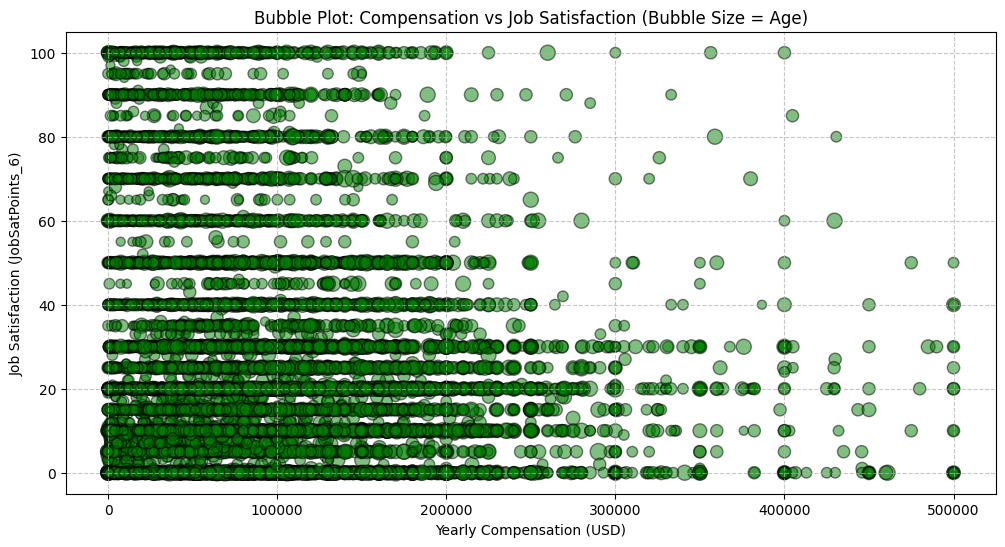

In [7]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Step 2: Query relevant columns
QUERY = """
SELECT ConvertedCompYearly, JobSatPoints_6, Age
FROM main
WHERE ConvertedCompYearly IS NOT NULL 
  AND JobSatPoints_6 IS NOT NULL
  AND Age IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Step 3: Close the connection
conn.close()

# Step 4: Clean data
df = df[df['ConvertedCompYearly'] <= 500000]  # Remove extreme outliers

# Step 5: Convert Age to numeric
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70,
    'Prefer not to say': None
}
df['AgeNumeric'] = df['Age'].map(age_mapping)
df = df.dropna(subset=['AgeNumeric'])

# Step 6: Create Bubble Plot
plt.figure(figsize=(12,6))
plt.scatter(
    df['ConvertedCompYearly'], 
    df['JobSatPoints_6'], 
    s=df['AgeNumeric']*2,  # Bubble size scaled by age
    alpha=0.5, 
    color='green',
    edgecolors='black'
)
plt.title("Bubble Plot: Compensation vs Job Satisfaction (Bubble Size = Age)")
plt.xlabel("Yearly Compensation (USD)")
plt.ylabel("Job Satisfaction (JobSatPoints_6)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



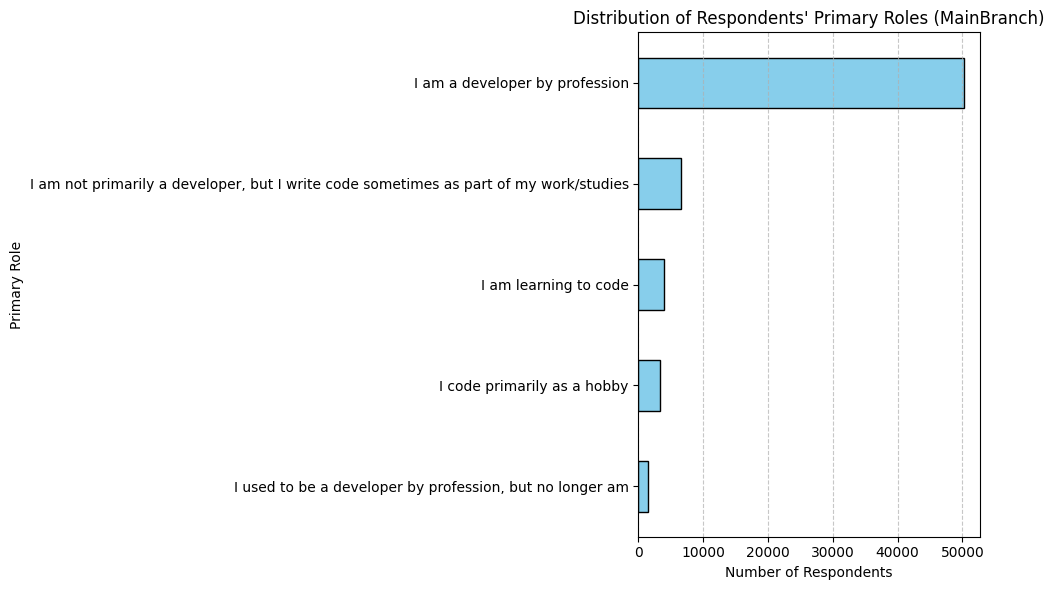

In [8]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Step 2: Query the MainBranch column
QUERY = """
SELECT MainBranch
FROM main
WHERE MainBranch IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Step 3: Close the connection
conn.close()

# Step 4: Count occurrences of each MainBranch
mainbranch_counts = df['MainBranch'].value_counts().sort_values(ascending=True)

# Step 5: Create Horizontal Bar Chart
plt.figure(figsize=(10,6))
mainbranch_counts.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title("Distribution of Respondents' Primary Roles (MainBranch)")
plt.xlabel("Number of Respondents")
plt.ylabel("Primary Role")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



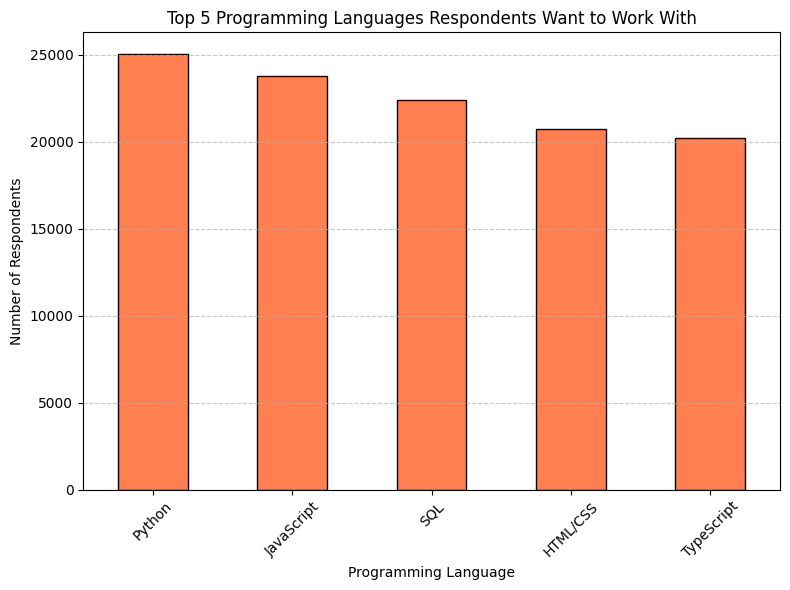

In [9]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Step 2: Query the LanguageWantToWorkWith column
QUERY = """
SELECT LanguageWantToWorkWith
FROM main
WHERE LanguageWantToWorkWith IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Step 3: Close the connection
conn.close()

# Step 4: Split multi-value entries and count each language
# Some entries are semicolon-separated lists of languages
all_languages = df['LanguageWantToWorkWith'].str.split(';').explode()
language_counts = all_languages.value_counts().head(5)  # Top 5 languages

# Step 5: Create Vertical Bar Chart
plt.figure(figsize=(8,6))
language_counts.plot(kind='bar', color='coral', edgecolor='black')
plt.title("Top 5 Programming Languages Respondents Want to Work With")
plt.xlabel("Programming Language")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


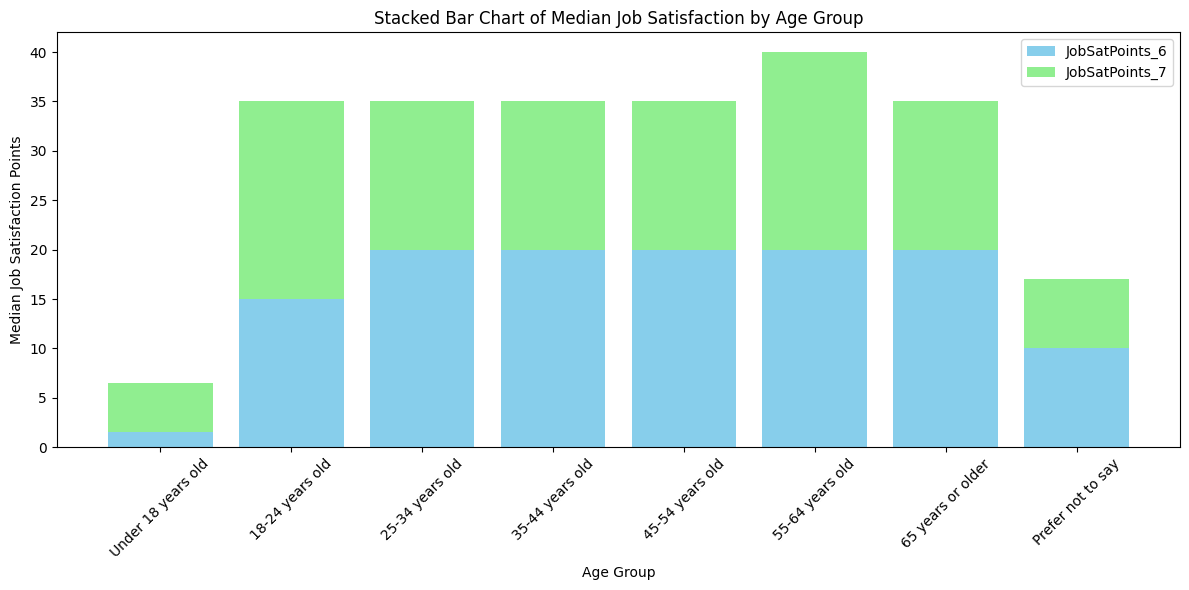

In [10]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Step 2: Query the relevant columns
QUERY = """
SELECT Age, JobSatPoints_6, JobSatPoints_7
FROM main
WHERE Age IS NOT NULL 
  AND JobSatPoints_6 IS NOT NULL 
  AND JobSatPoints_7 IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Step 3: Close the database connection
conn.close()

# Step 4: Optional - remove unrealistic values (if needed)
df = df[(df['JobSatPoints_6'] >= 0) & (df['JobSatPoints_7'] >= 0)]

# Step 5: Compute median for each Age group
median_df = df.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Step 6: Define the order of age groups
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old',
    '45-54 years old', '55-64 years old', '65 years or older', 'Prefer not to say'
]

# Reindex the dataframe according to age_order
median_df = median_df.reindex(age_order)

# Step 7: Create stacked bar chart
plt.figure(figsize=(12,6))
plt.bar(median_df.index, median_df['JobSatPoints_6'], label='JobSatPoints_6', color='skyblue')
plt.bar(median_df.index, median_df['JobSatPoints_7'], bottom=median_df['JobSatPoints_6'], label='JobSatPoints_7', color='lightgreen')

# Step 8: Customize plot
plt.title("Stacked Bar Chart of Median Job Satisfaction by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Median Job Satisfaction Points")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



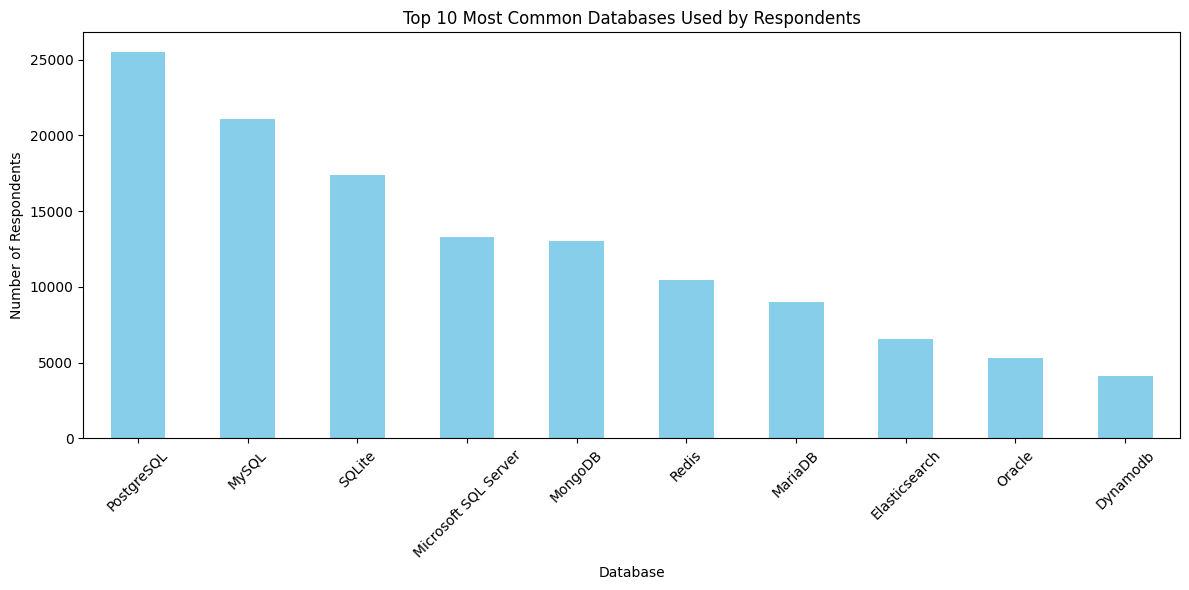

In [11]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Step 2: Query the DatabaseHaveWorkedWith column
QUERY = """
SELECT DatabaseHaveWorkedWith
FROM main
WHERE DatabaseHaveWorkedWith IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn)

# Step 3: Close the database connection
conn.close()

# Step 4: Split multiple databases per respondent (they are separated by semicolons)
df_exploded = df['DatabaseHaveWorkedWith'].str.split(';', expand=True).stack().reset_index(drop=True)

# Step 5: Count frequency of each database
db_counts = df_exploded.value_counts().head(10)  # top 10 databases

# Step 6: Create bar chart
plt.figure(figsize=(12,6))
db_counts.plot(kind='bar', color='skyblue')
plt.title("Top 10 Most Common Databases Used by Respondents")
plt.xlabel("Database")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



In [ ]:
## Write your code here

##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



In [ ]:
## Write your code here

### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
